In [1]:
%reload_ext autoreload
%autoreload 2
from VirusHostNetworkAnalysis.pipeline import Pipeline

# Global Variables

**INPUT_FILE:** The path to the VHIP output, which is a tsv file.<br>
**NULL_TYPE:** Can be "CM", "ER", or "None" <br>
**P_CUTOFF:** The probability to be used to randomly fill the ER matrix. <br> 
**CM_METHOD:** <br> 
**PERCENT_SHUFFLE_VIRUS:** <br> 
**PERCENT_SHUFFLE_HOST:** <br> 
**NUM_RUNS:** The number of times to run the Configuration. Statistics are recalculated after each run to create plots that will determine the number of swaps to make. <br>
**PROBABILITY_MATRIX:** True or False. If True, will calculate the probability matrix as well as the prediction matrix. If only the prediciton matrix is needed, can be set to False to save time. <br>
**MAX_ITER:** <br>
**NUM_CORES:** The number of cores to be used for multiple processing tasks. If not specified, the default is 6 cores.<br>
**SINGLE_COLOR:** Enter a single color name. The default is "indigo".  The color will be used for predicted interactions and white will be used for non-predicted interactions.<br>
**COLORMAP:** For probability heatmaps, enter a list of 5 colors. The colors will be used to create a gradient, where the middle color represents 50% probability. The default is color_map=["red", "lightpink", "white", "lightskyblue", "blue"]. <br>
**COLOR_RANGE:** For probability heatmaps, enter the range of values to be used for the color gradient. This can change how far each color stretches. The default is [0, 0.2, 0.45, 0.55, 0.8, 1]. When using the default range and colors, red will range from 0-0.2, lightpink from 0.2-0.45, white from 0.45-0.55, lightskyblue from 0.55-0.8, and blue from 0.8-1.<br>

In [2]:
INPUT_FILE = "Sample_Input/Aug4_predictions.tsv"
NULL_TYPE = "CM"
P_CUTOFF = 0.1
CM_METHOD = "curveball"
PERECENT_SHUFFLE_VIRUS = 0.3
PERCENT_SHUFFLE_HOST = 0.3
NUM_RUNS = 30
PROBABILITY_MATRIX = False
MAX_ITER = 3000
NUM_CORES = 8
SINGLE_COLOR = "indigo"
COLORMAP = ["red", "lightpink", "white","lightskyblue", "blue"]
COLOR_RANGE = [0, 0.2, 0.45, 0.55, 0.8, 1]

## Run the pipeline function find_num_swaps() to generate plots that will help determine how many swaps should be used.

In [3]:
run = Pipeline(INPUT_FILE, NULL_TYPE, P_CUTOFF, CM_METHOD, PERECENT_SHUFFLE_VIRUS, PERCENT_SHUFFLE_HOST, NUM_RUNS, NUM_CORES, PROBABILITY_MATRIX, MAX_ITER)

In [4]:
#run.find_num_swaps()

## Run the pipeline

In [5]:
run.run_pipeline()


Nestedness:  61.0361387336295
Percent edges:  0.3618546669604171
Average number of viruses per host:  2318.764705882353
Average number of hosts per virus:  6.151529338327091
  Infomap v2.8.0 starts at 2025-05-23 10:58:44
  -> Input network: 
  -> No file output!
  -> Ordinary network input, using the Map Equation for first order network flows
Calculating global network flow using flow model 'undirected'... 
  -> Using undirected links.
  => Sum node flow: 1, sum link flow: 1
Build internal network with 6425 nodes and 39419 links...
  -> One-level codelength: 9.12611876

Trial 1/1 starting at 2025-05-23 10:58:44
Two-level compression: -1e-11% 1.4e-11% 
Partitioned to codelength 0 + 9.12611876 = 9.126118763 in 148 (1 non-trivial) modules.
Super-level compression: to codelength 9.126118763 in 148 top modules.

Recursive sub-structure compression: 0% . Found 2 levels with codelength 9.126118763

=> Trial 1/1 finished in 0.032542417s with codelength 9.12611876


Summary after 1 trial
Best e

Running iterations: 100%|██████████| 30/30 [4:10:53<00:00, 501.78s/it]  


## Specify plots to make

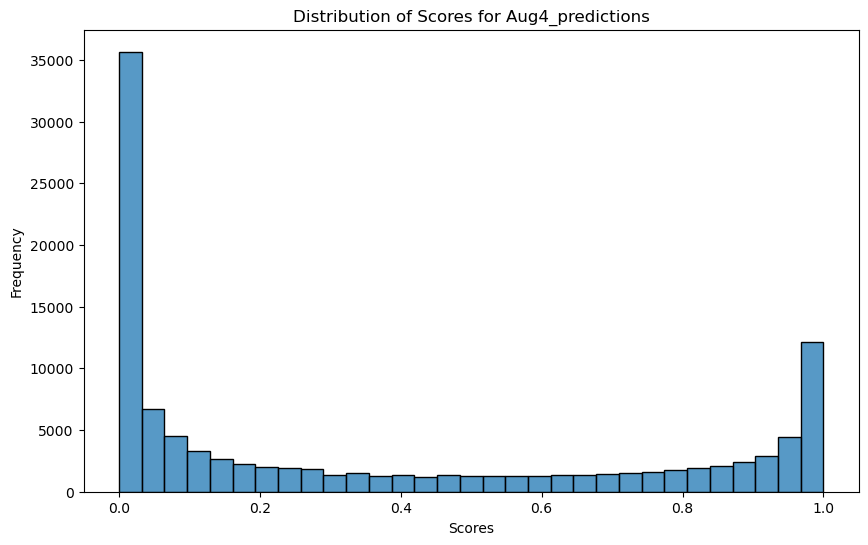

In [19]:
run.visualize_scores()

['49623--k141_46368||full.fasta' '49623--k141_264109_1.fasta'
 '49620--k141_47043_1.fasta' ... '49640--k141_49893||full.fasta'
 '49640--k141_166774||full.fasta' '49640--k141_30033||full.fasta'] 6408
[   0    1    2 ... 6310 6311 6407] 6408


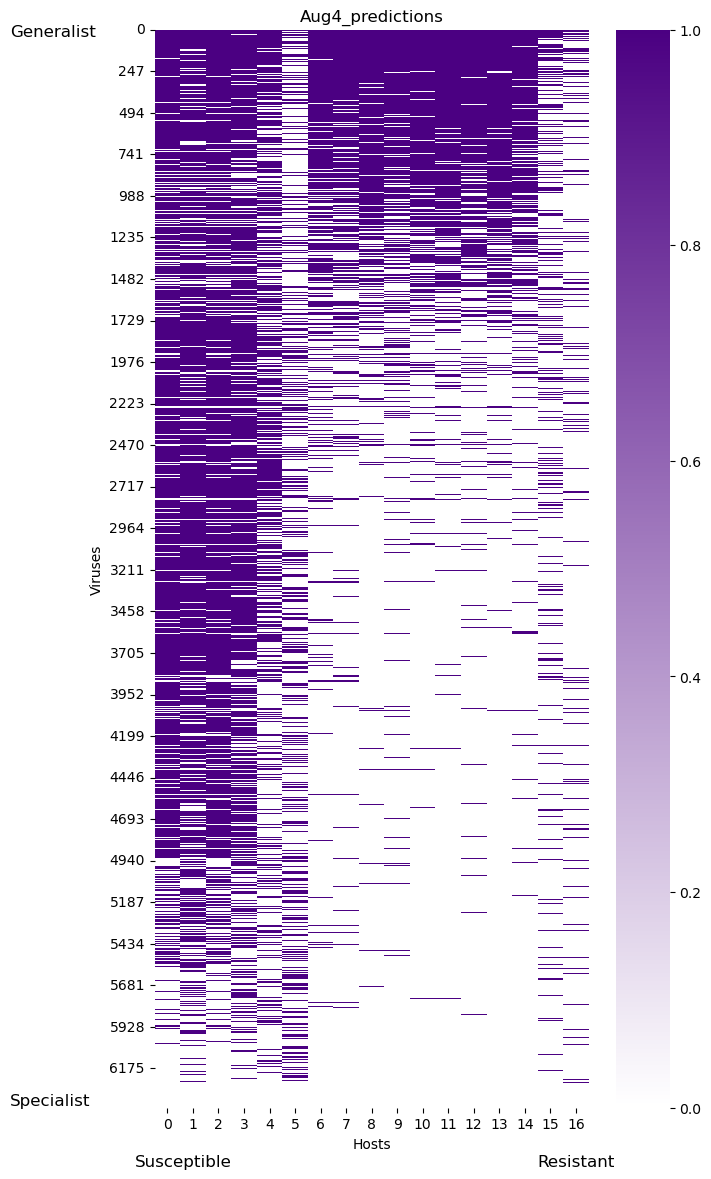

In [7]:
run.visualize_prediction_heatmap(SINGLE_COLOR)

In [8]:
if PROBABILITY_MATRIX is True:
    run.visualize_probability_heatmap(COLORMAP, COLOR_RANGE)

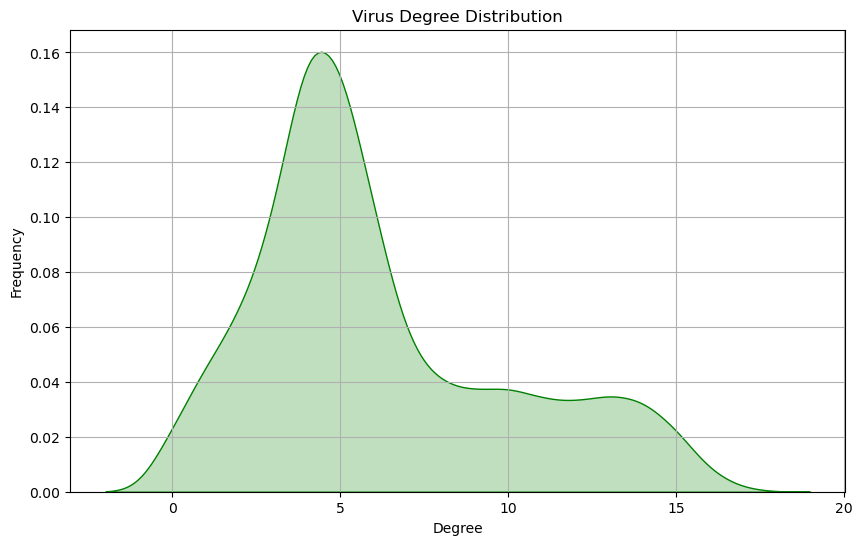

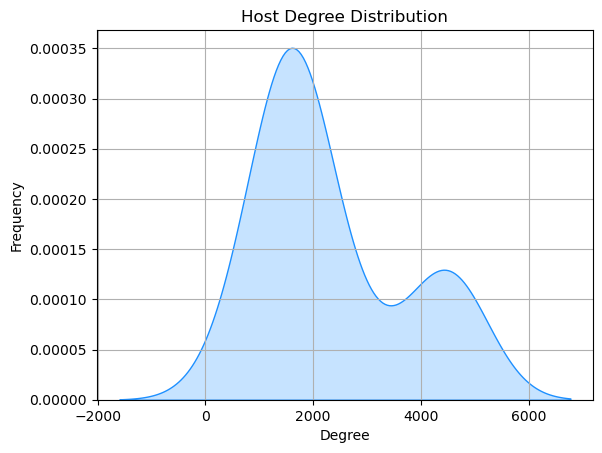

In [20]:
run.visualize_degree_distribution()

<Figure size 1000x600 with 0 Axes>

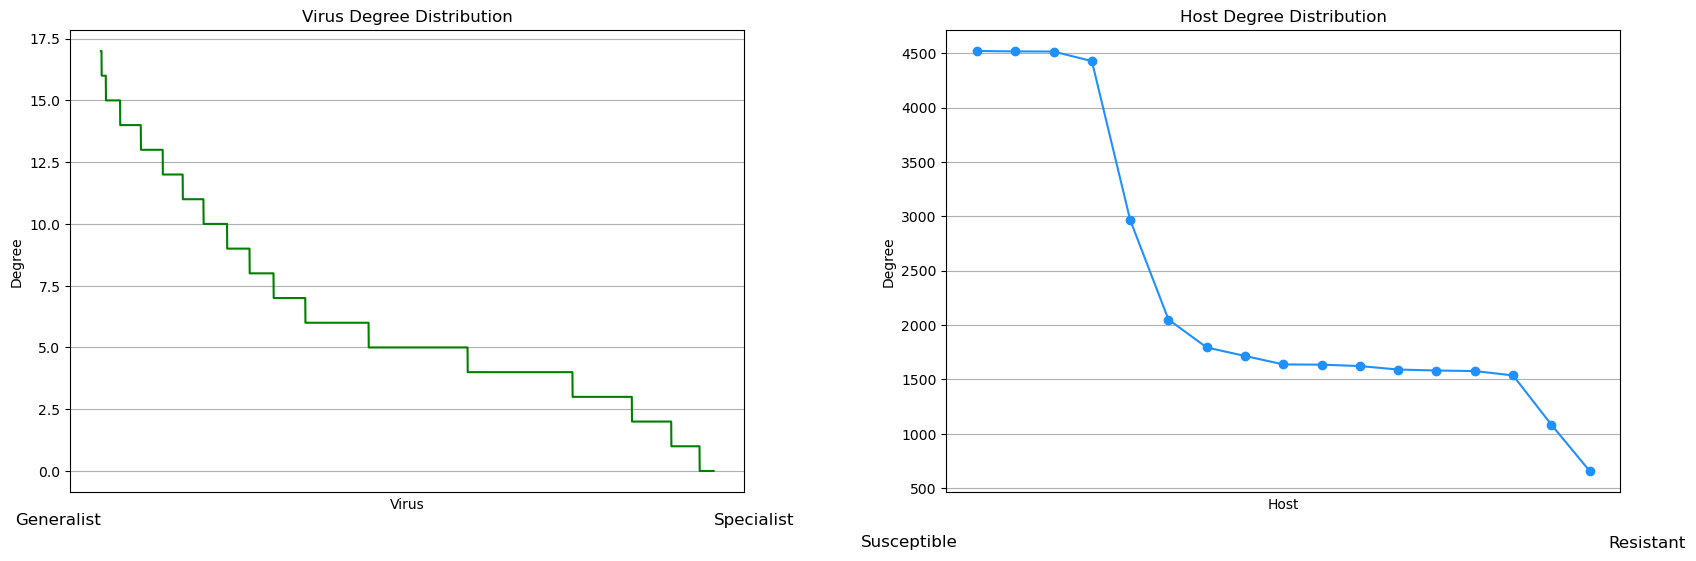

In [10]:
run.visualize_degree_by_species()

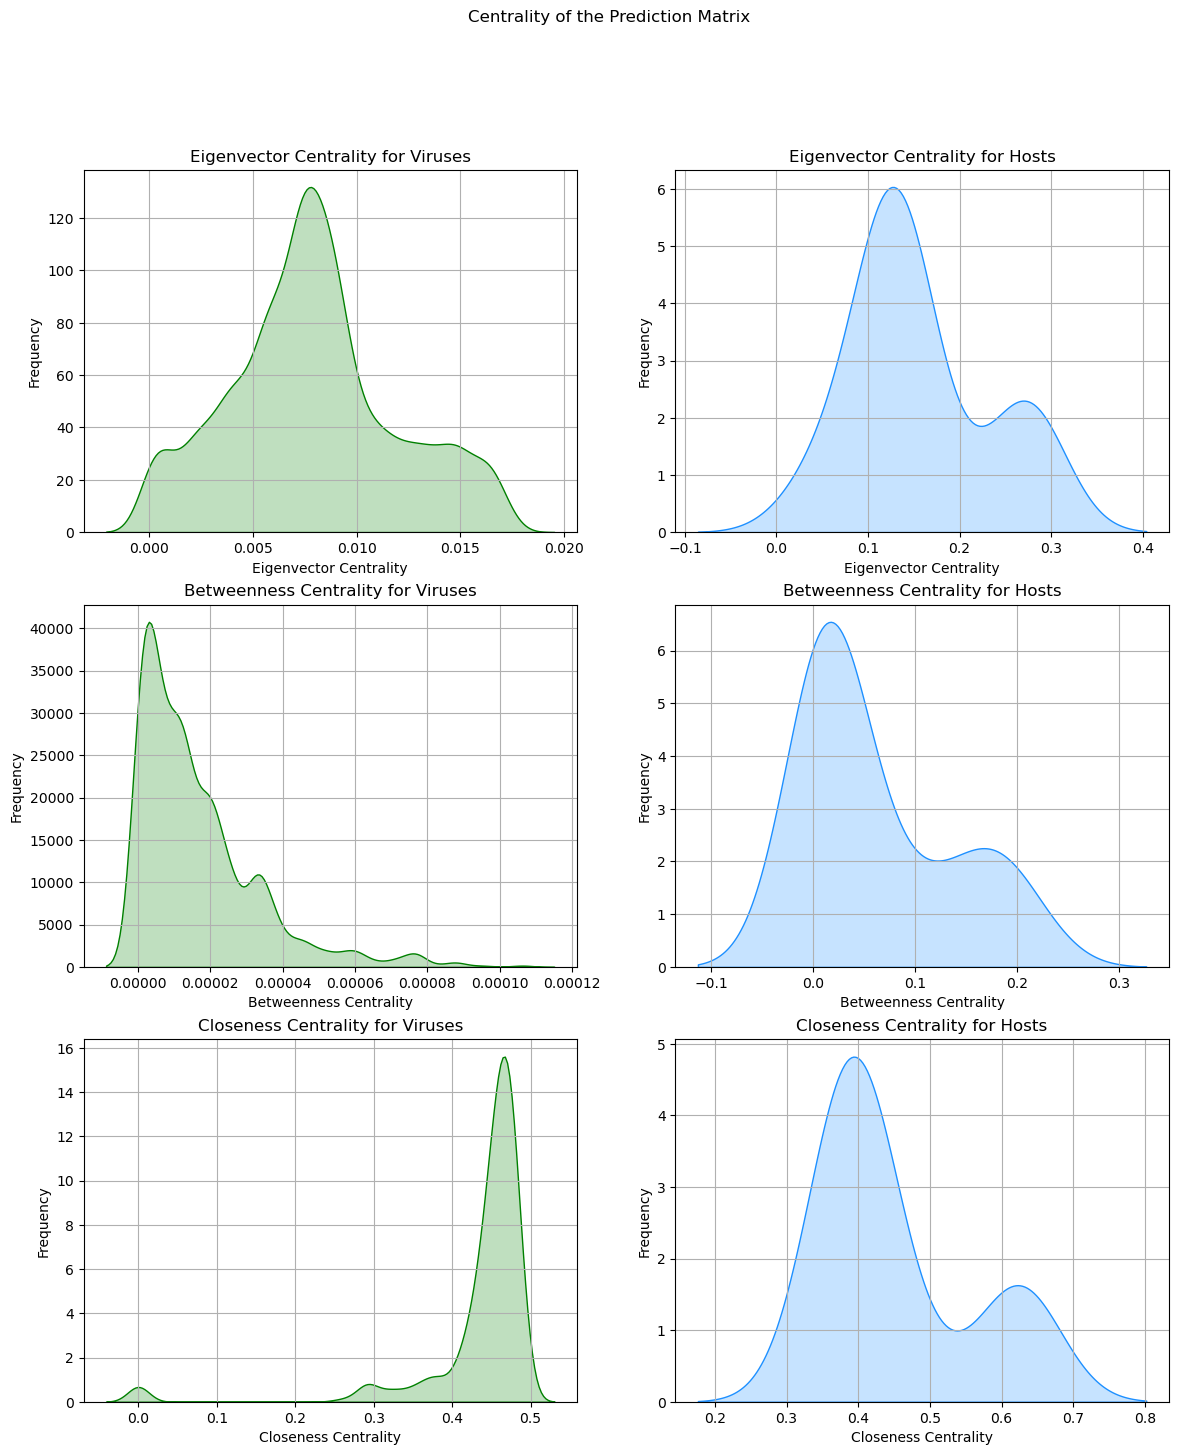

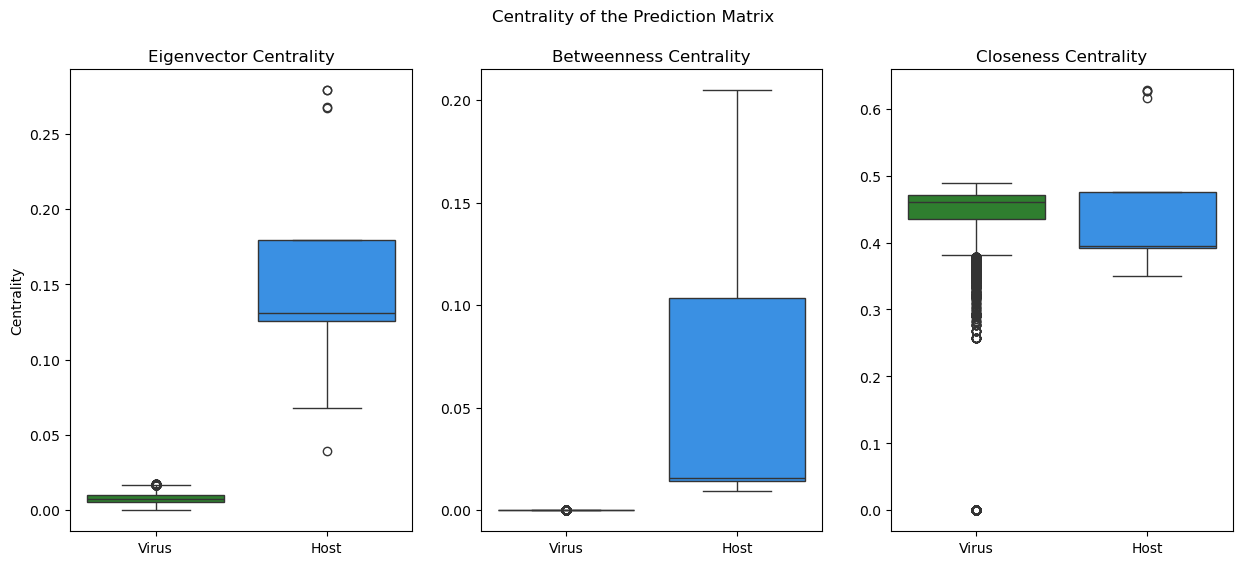

In [22]:
run.visualize_prediction_centrality()

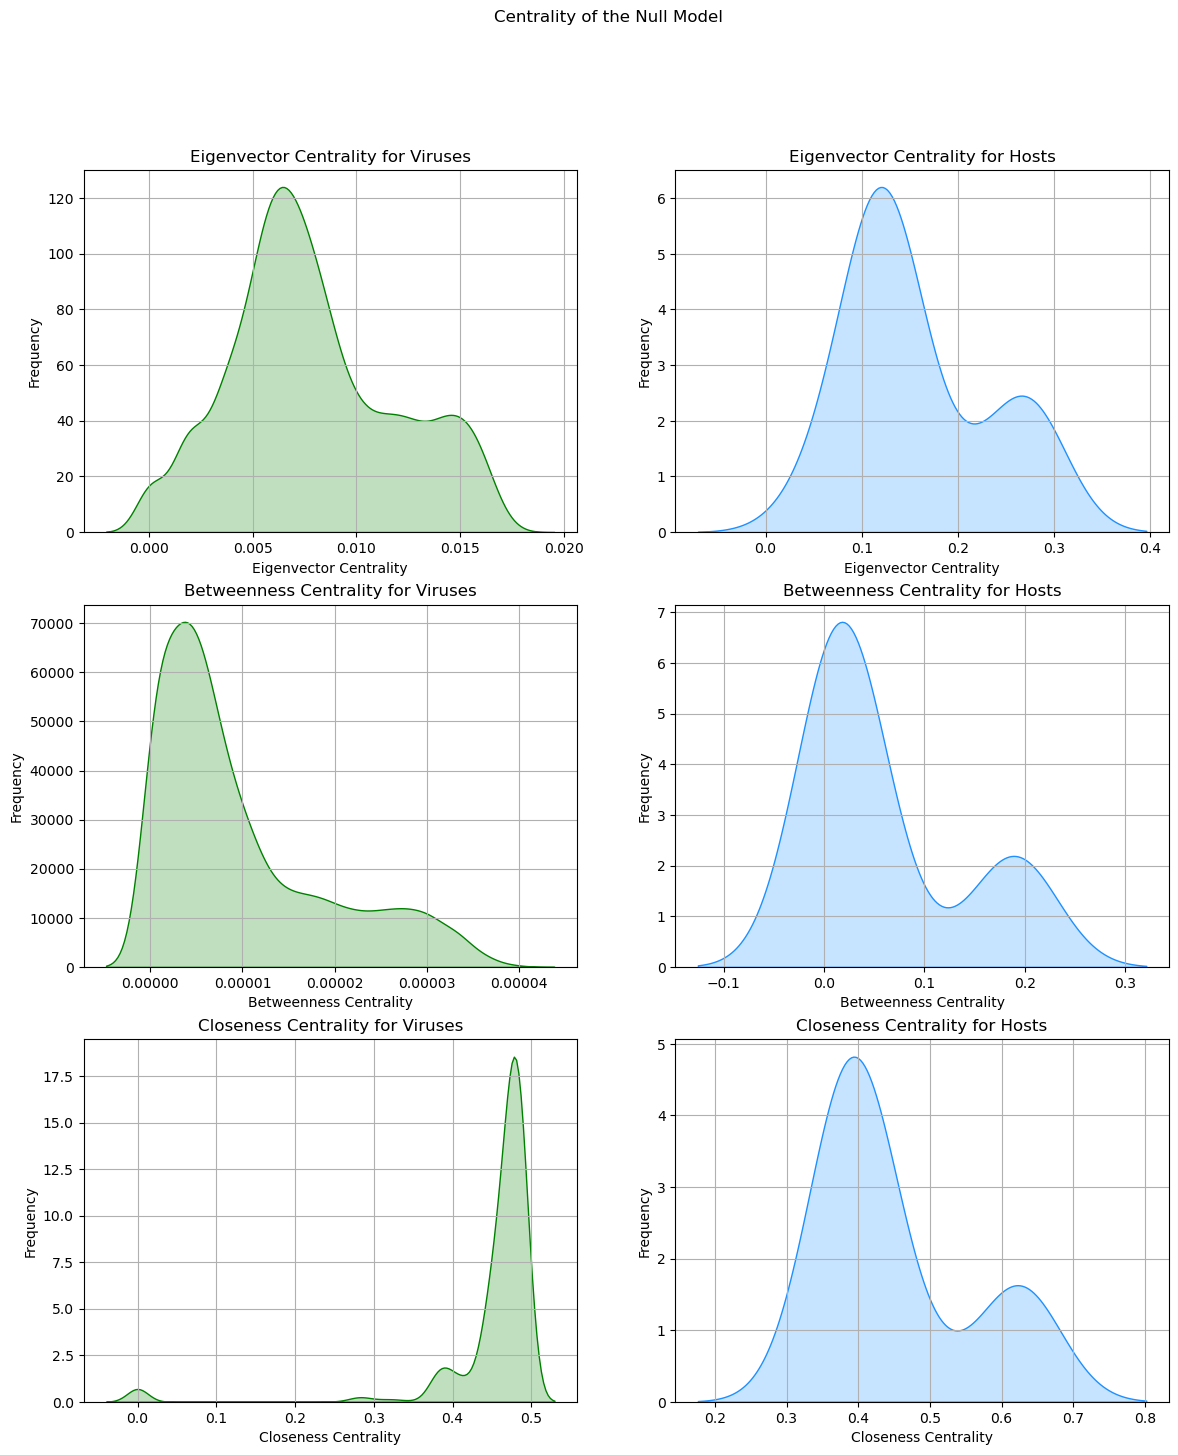

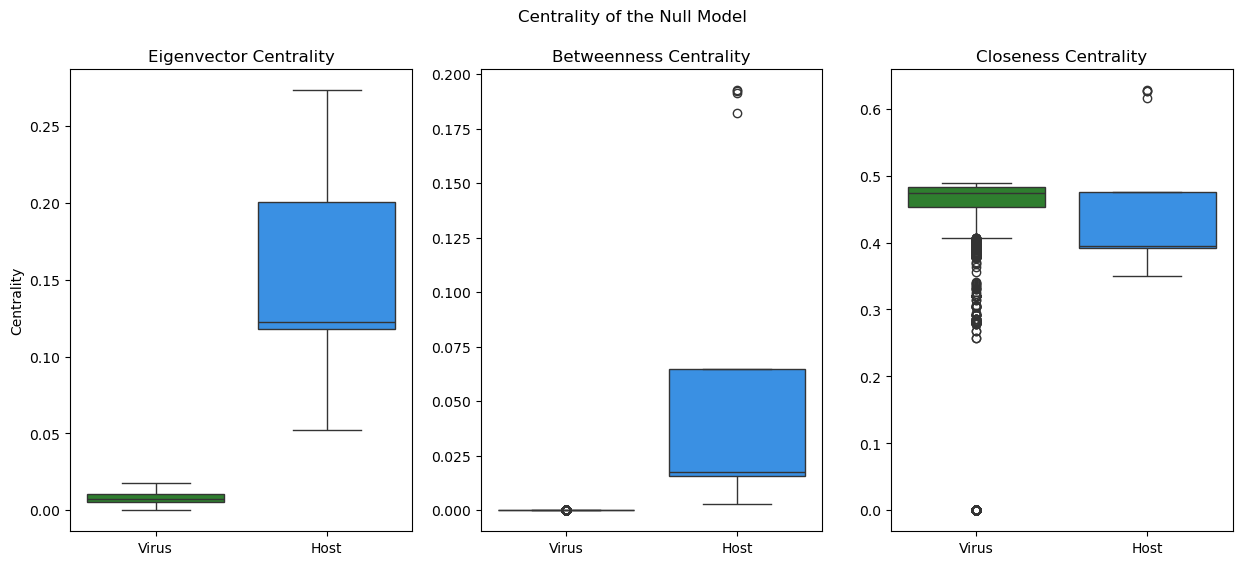

In [21]:
run.visualize_null_centrality()

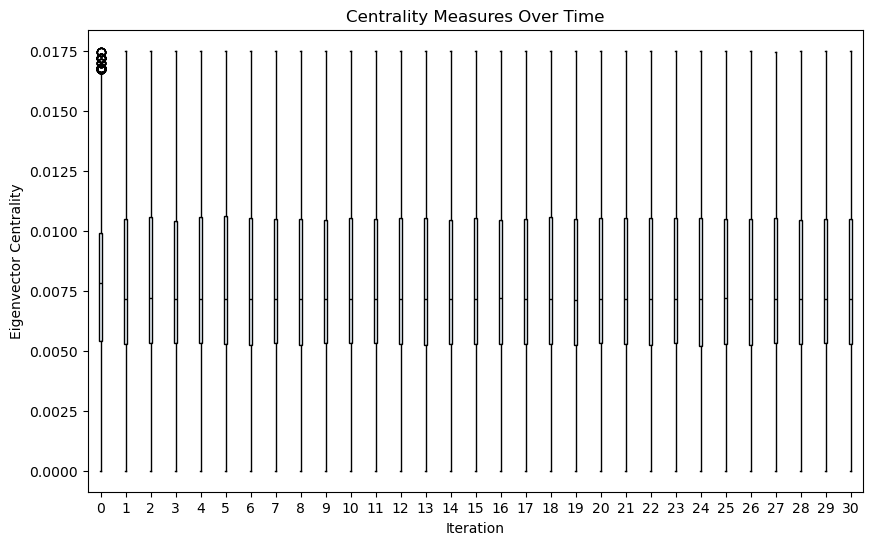

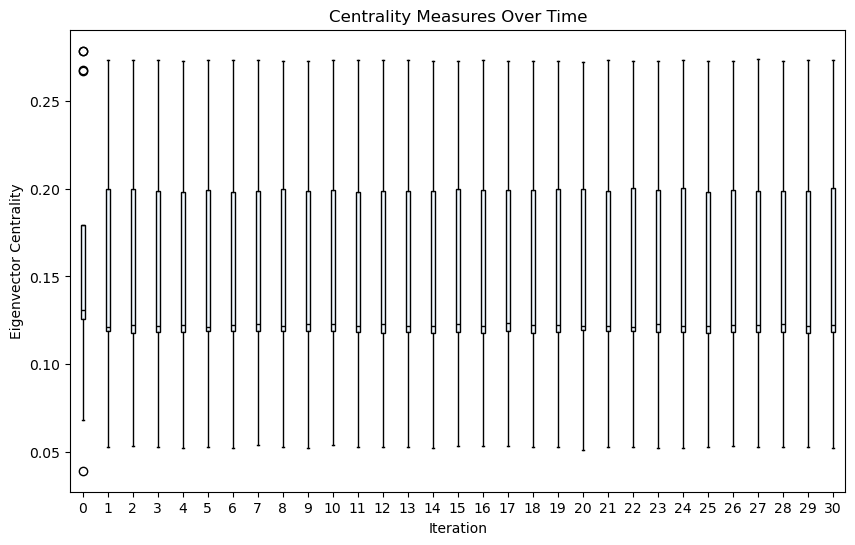

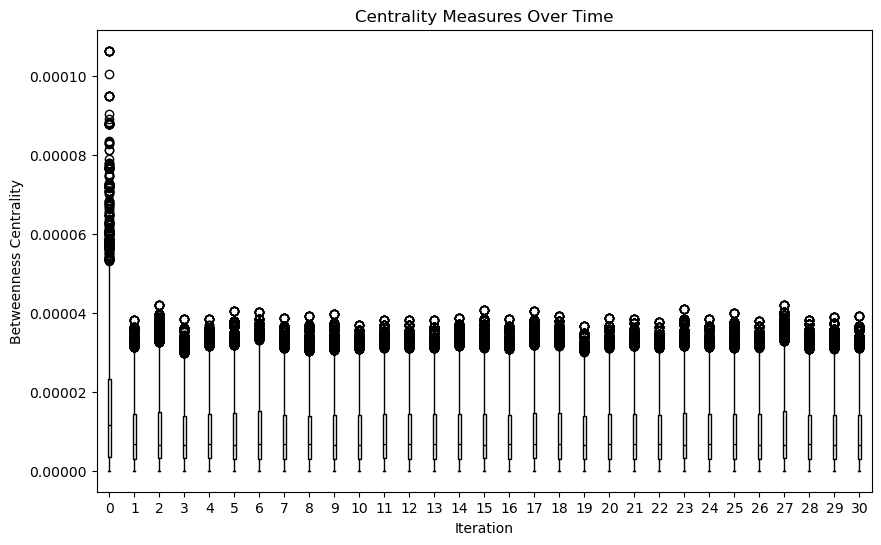

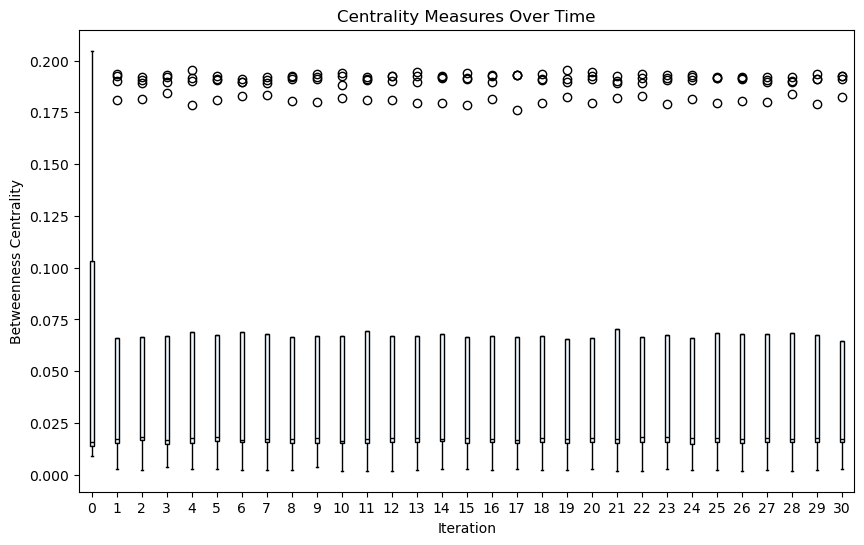

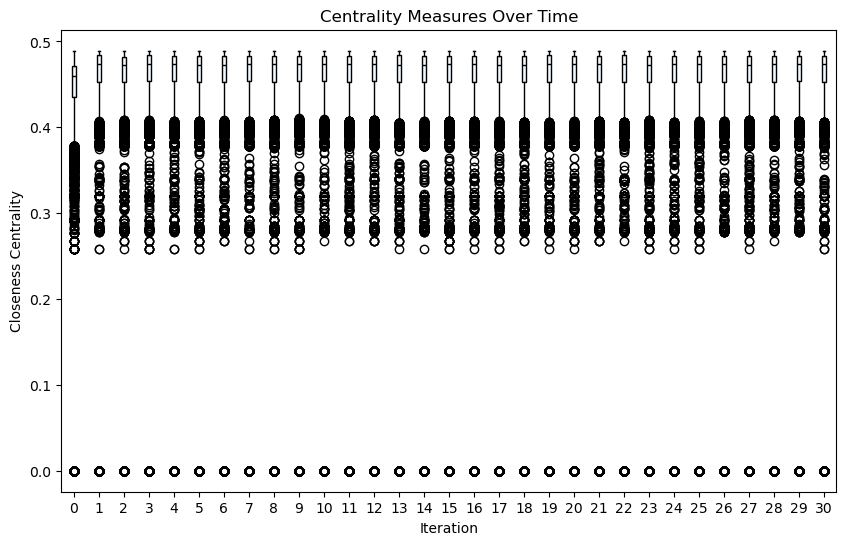

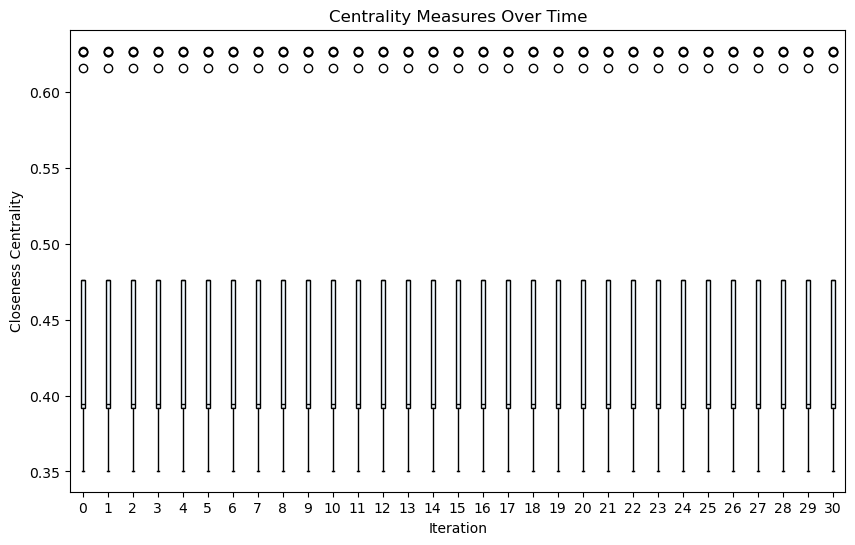

In [23]:
run.visualize_centrality_over_i()

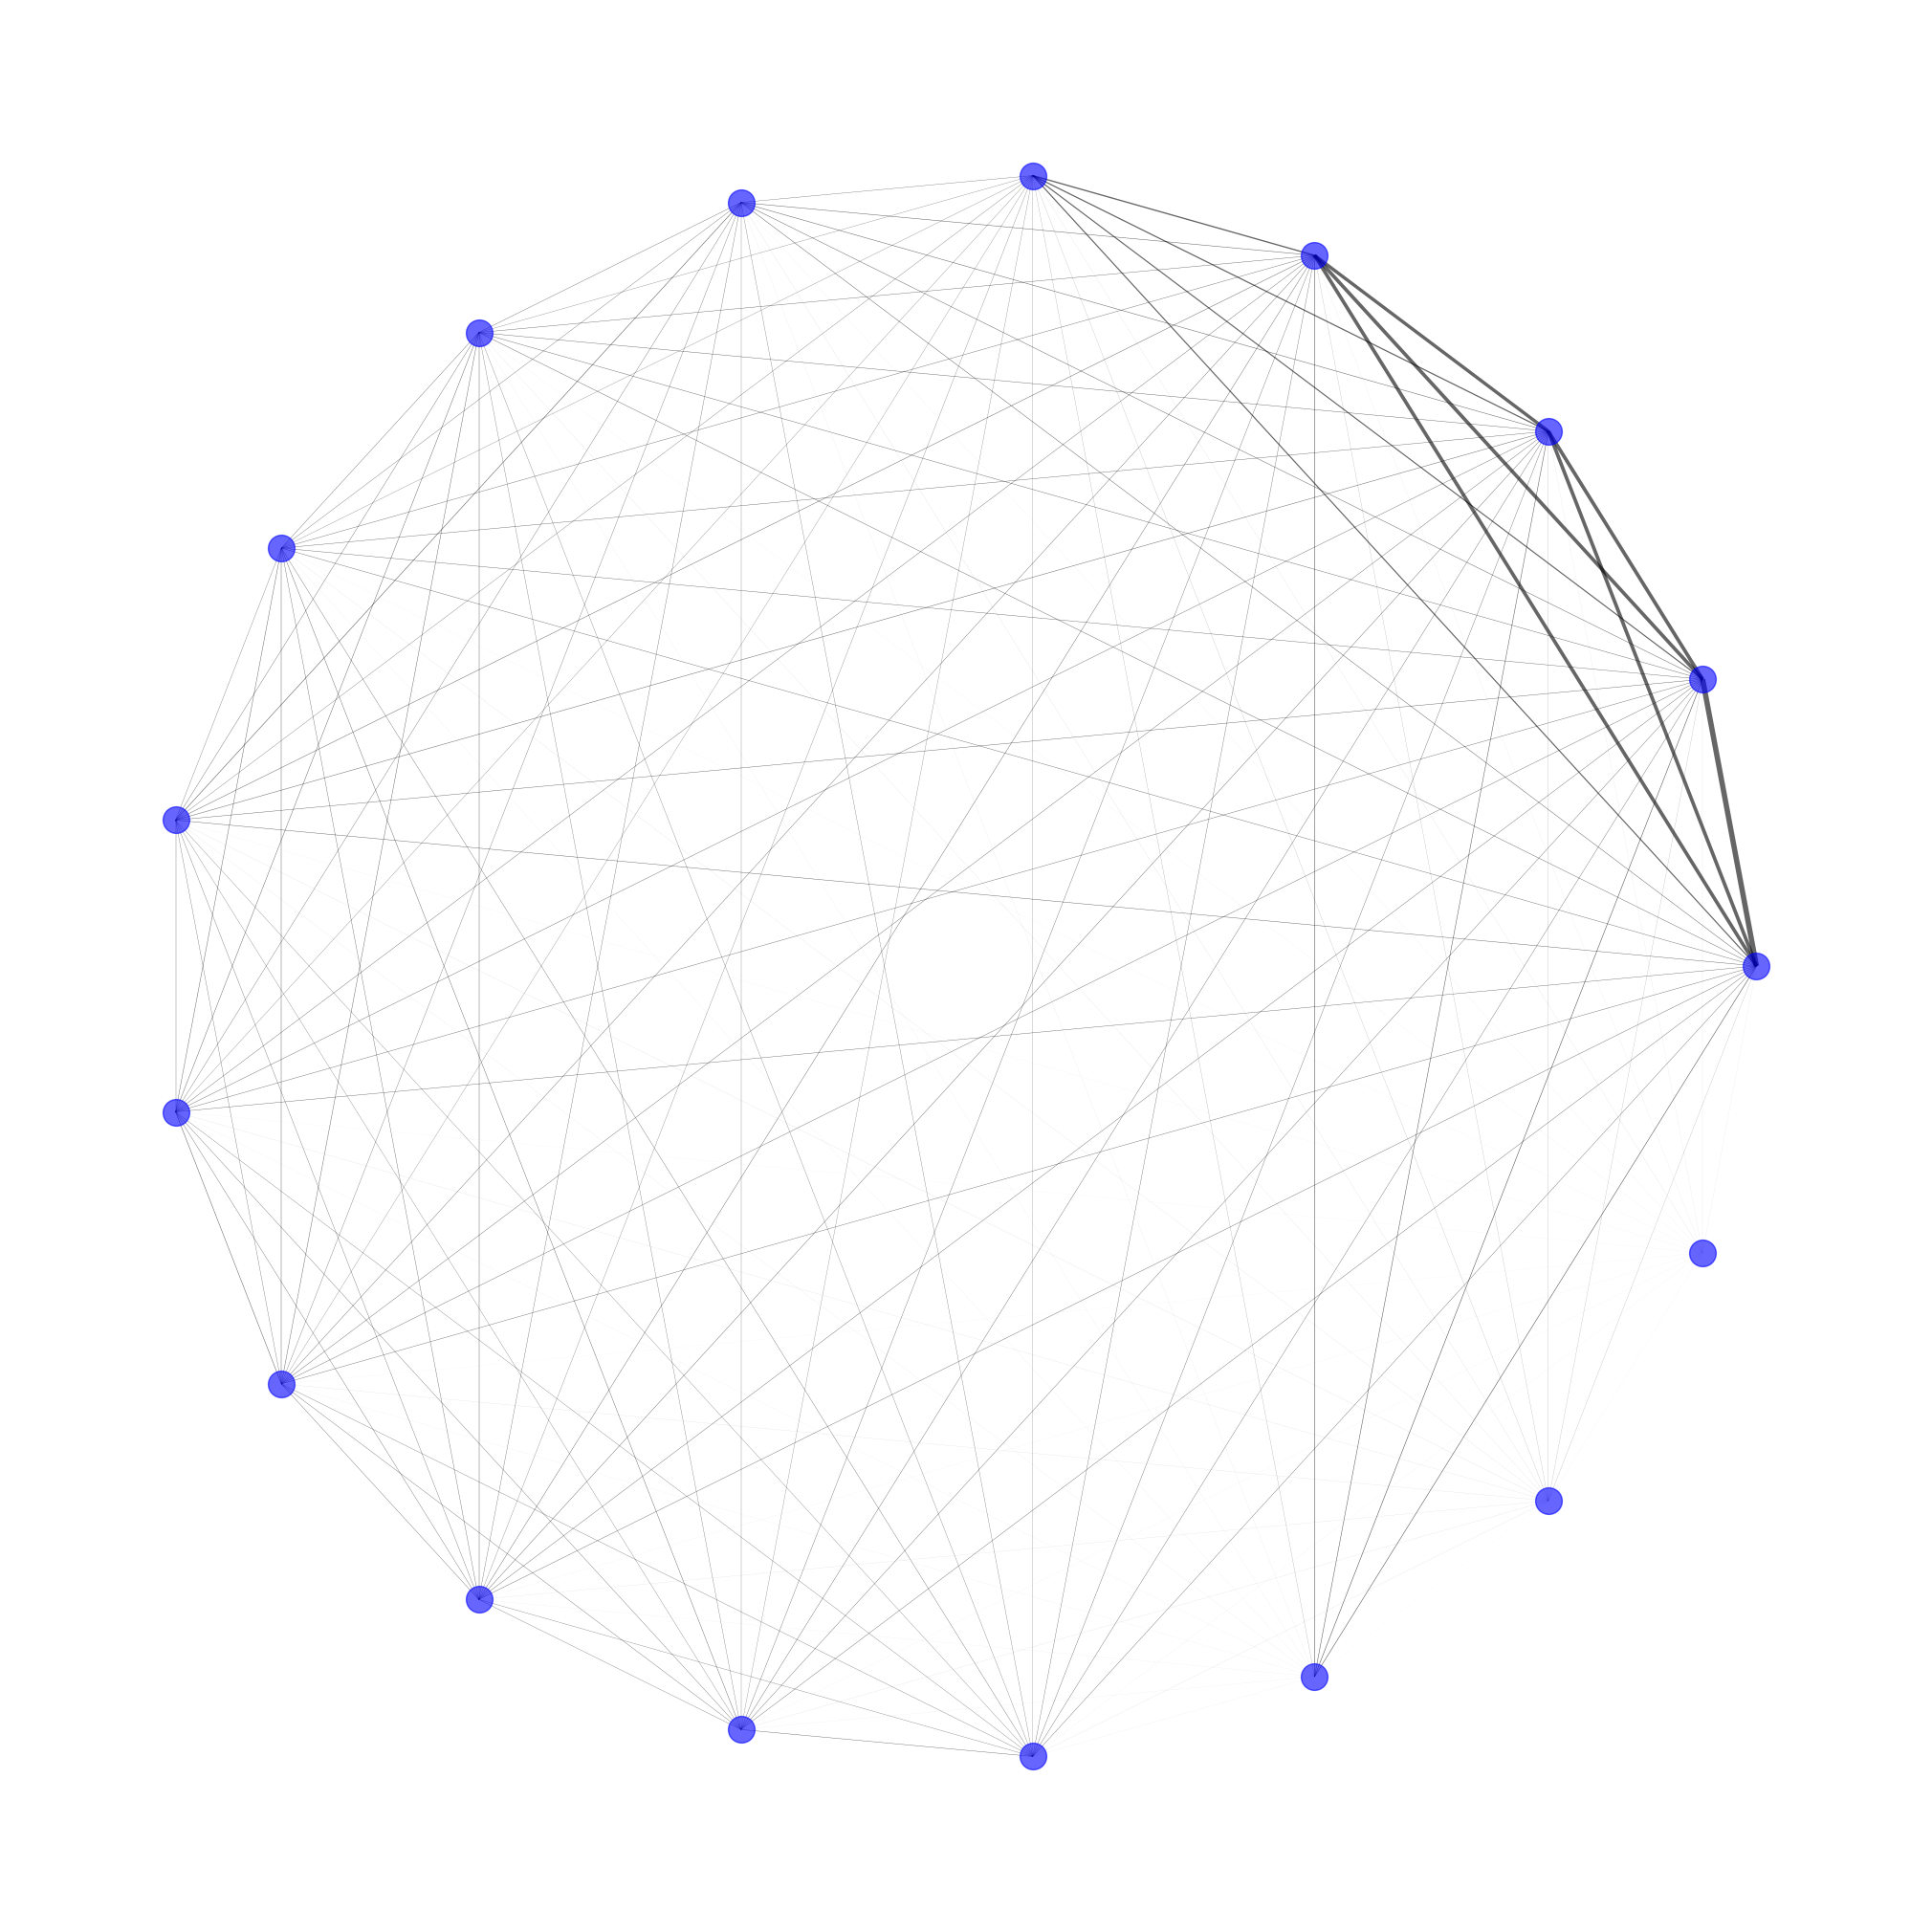

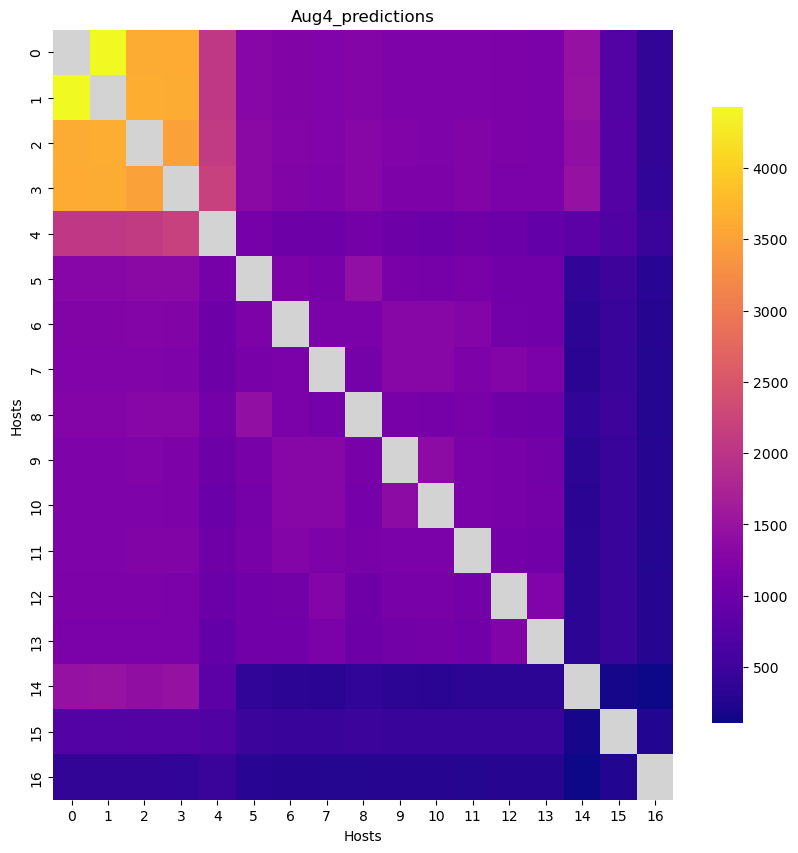

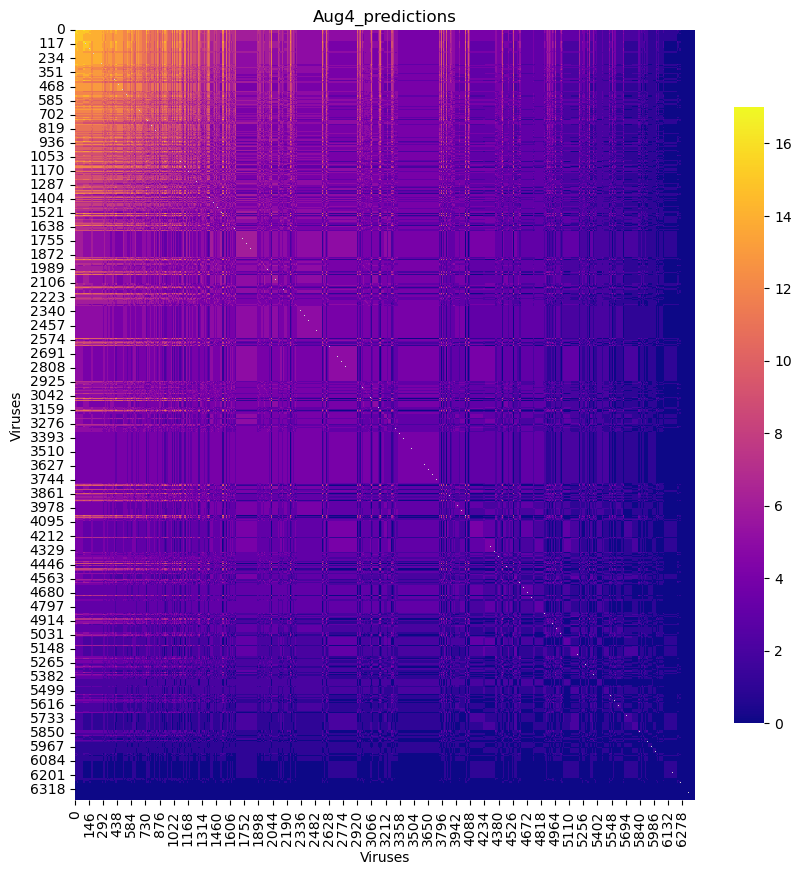

In [14]:
run.visualize_unipartite_projection()

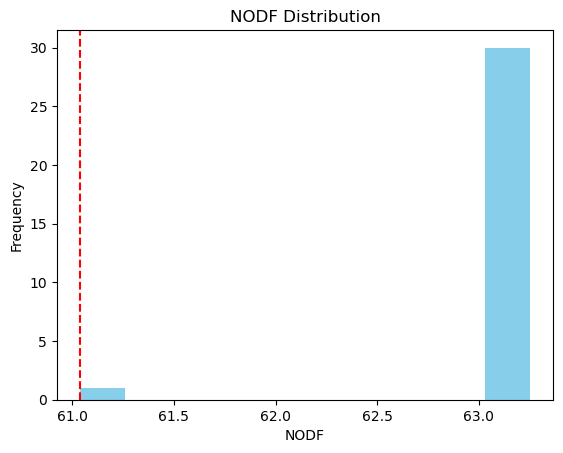

In [24]:
run.visualize_nestedness_distribution()

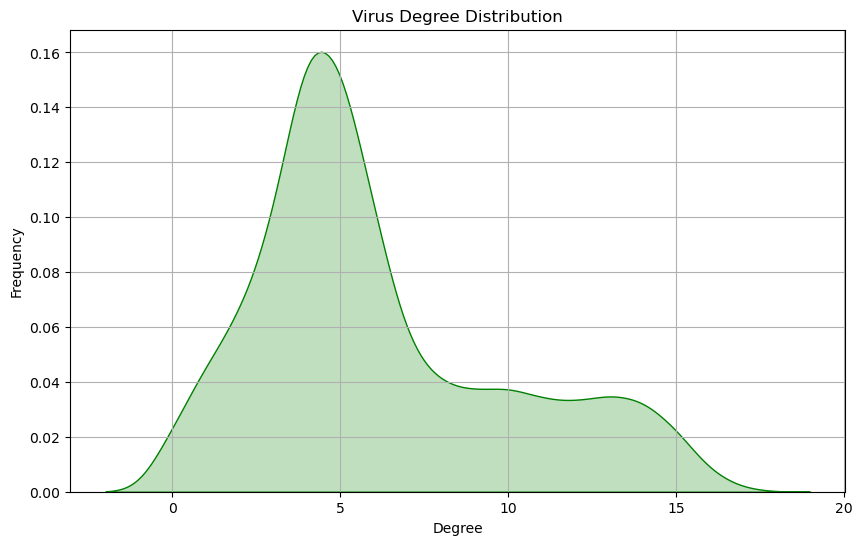

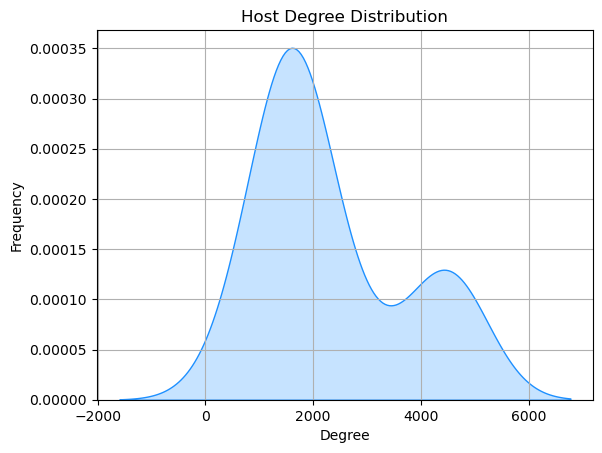

In [25]:
run.visualize_degree_distribution_null()

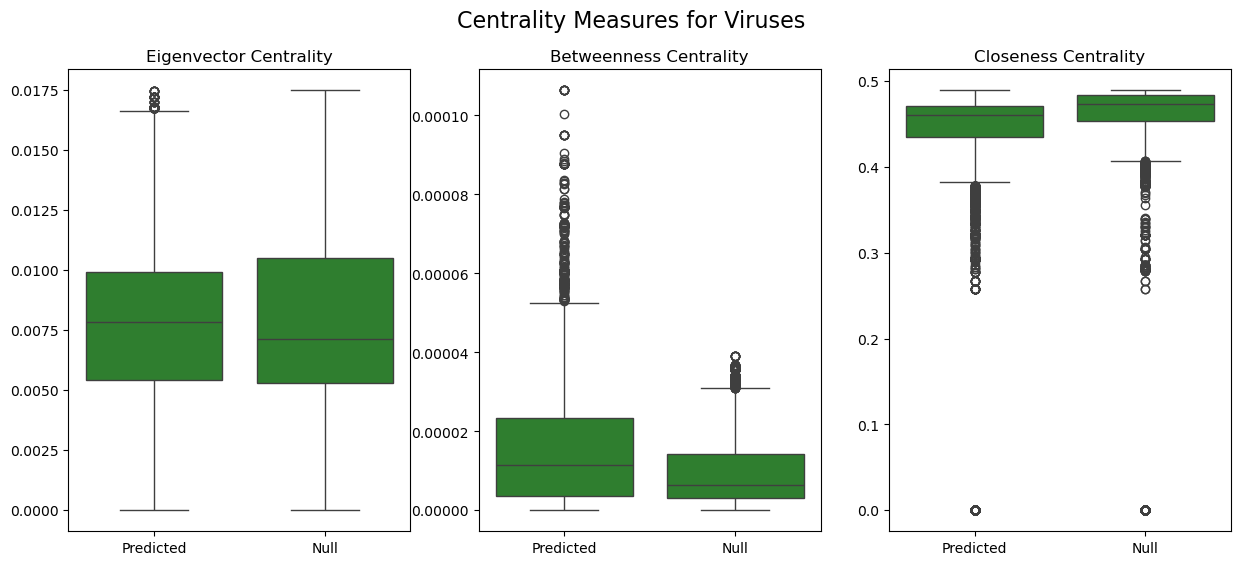

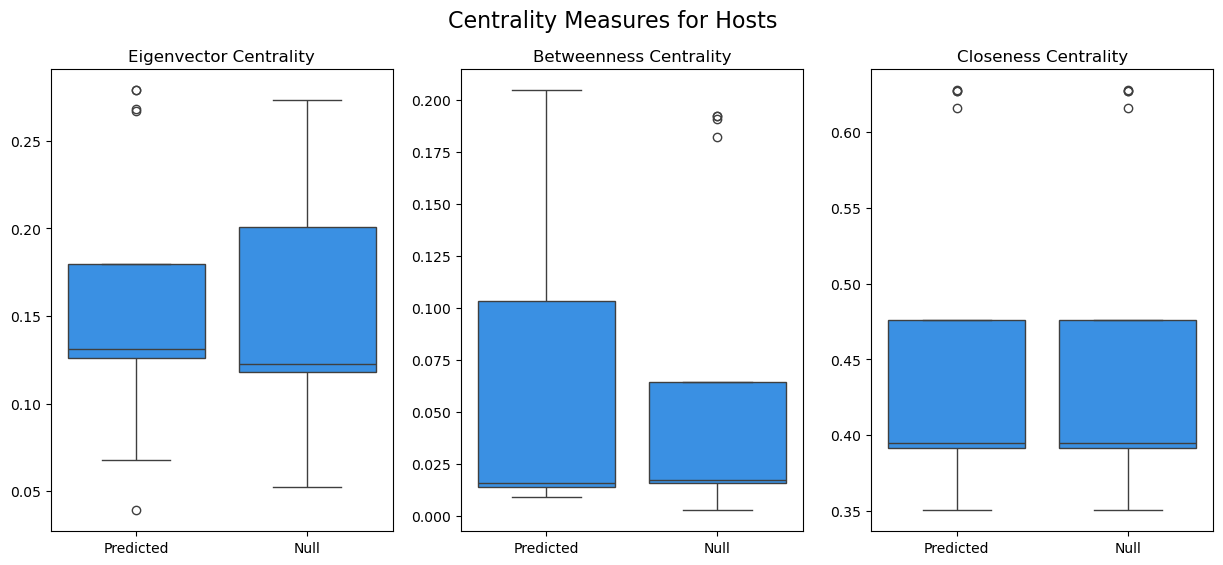

In [31]:
run.visualize_prediction_vs_null_centrality()

## Export the data into tables

In [30]:
run.export_pipeline_data("Results", "Aug4_Curveball_30Runs")

        Method          Iteration  Number of Swaps  Nestedness
0   Prediction         Prediction           394190   61.036139
1           CM   Null iteration 1           394190   63.136114
2           CM   Null iteration 2           394190   63.062368
3           CM   Null iteration 3           394190   63.185564
4           CM   Null iteration 4           394190   63.140313
5           CM   Null iteration 5           394190   63.146393
6           CM   Null iteration 6           394190   63.080834
7           CM   Null iteration 7           394190   63.180590
8           CM   Null iteration 8           394190   63.137173
9           CM   Null iteration 9           394190   63.139557
10          CM  Null iteration 10           394190   63.254277
11          CM  Null iteration 11           394190   63.133631
12          CM  Null iteration 12           394190   63.148993
13          CM  Null iteration 13           394190   63.169405
14          CM  Null iteration 14           394190   63